#  AI for practicioners

## Supervised Learning [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) [sklearn]

The decision tree is one of the easiest techniques to interpret by humans, it can be visualized in an intuitive way. It is also one of the easiest to understand.

### Advantages of a Decision Tree
------------------------------------------------------------
- Very fast to train
- Easy to understand a trained model (explainable machine learning)
- Can deal with both numerical and categorical data

### Disadvantages of a Decision Tree
------------------------------------------------------------
- Overly complex trees may overfit the data, depending on
- Small deviations in data can lead to completely different models / trees

### The parameters of a Decision Tree include
------------------------------------------------------------
- Max depth of tree (low values may overfit data, high values may underfit data)
- Minimum samples in a leaf node ( low values may overfit data, high values may underfit data)

In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

## comment out if you dont have it installed, but visualizing tree is not possible then
import graphviz
from graphviz import Source
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
# bigger plots
plt.rcParams['figure.figsize'] = [20, 15]

In [3]:
import os

# Download the data from our GitLab page
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
!wget https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv

data_directory = os.path.join('/content/')

--2023-11-21 10:11:48--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018-toelichting.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375 (3.3K) [text/plain]
Saving to: ‘kwb-2018-toelichting.csv’

kwb-2018-toelichtin 100%[===================>]   3.30K  --.-KB/s    in 0s      

2023-11-21 10:11:48 (60.1 MB/s) - ‘kwb-2018-toelichting.csv’ saved [3375/3375]

--2023-11-21 10:11:48--  https://gitlab.com/CBDS/kennisgebied_ai/-/raw/master/data/kwb-2018.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3774153 (3.6M) [text/plain]
Saving to: ‘kwb-2018.csv’

kwb-2018.csv        100%[===================>]   3.60M  16.5MB/s    in 0.2s    

2023-11-2

# Example: Logical Gates

In [4]:
feature_names = ['gate_1','gate_2']
target_names = ['true','false']

y_options = {'AND': np.array([0,
                              0,
                              0,
                              1]),
             'NAND':np.array([1,
                              1,
                              1,
                              0]),
             'OR':  np.array([0,
                              1,
                              1,
                              1]),
             'NOR': np.array([1,
                              0,
                              0,
                              0]),
             'XOR': np.array([0,
                              1,
                              1,
                              0]),}

X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

Y = y_options['XOR']

#### Train the decision tree model

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
decision_tree.fit(X, Y)

DecisionTreeClassifier(max_depth=2)

#### Visualize the decision tree

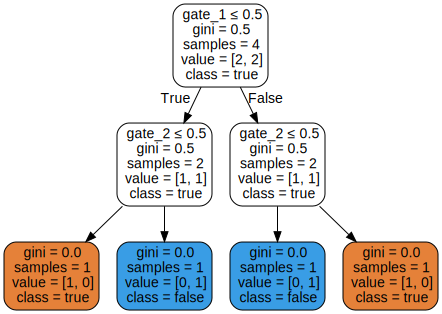

In [6]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                      feature_names=feature_names,
                      class_names=target_names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Visualize the decision boundary

Text(0.5, 1.0, 'Decision Tree')

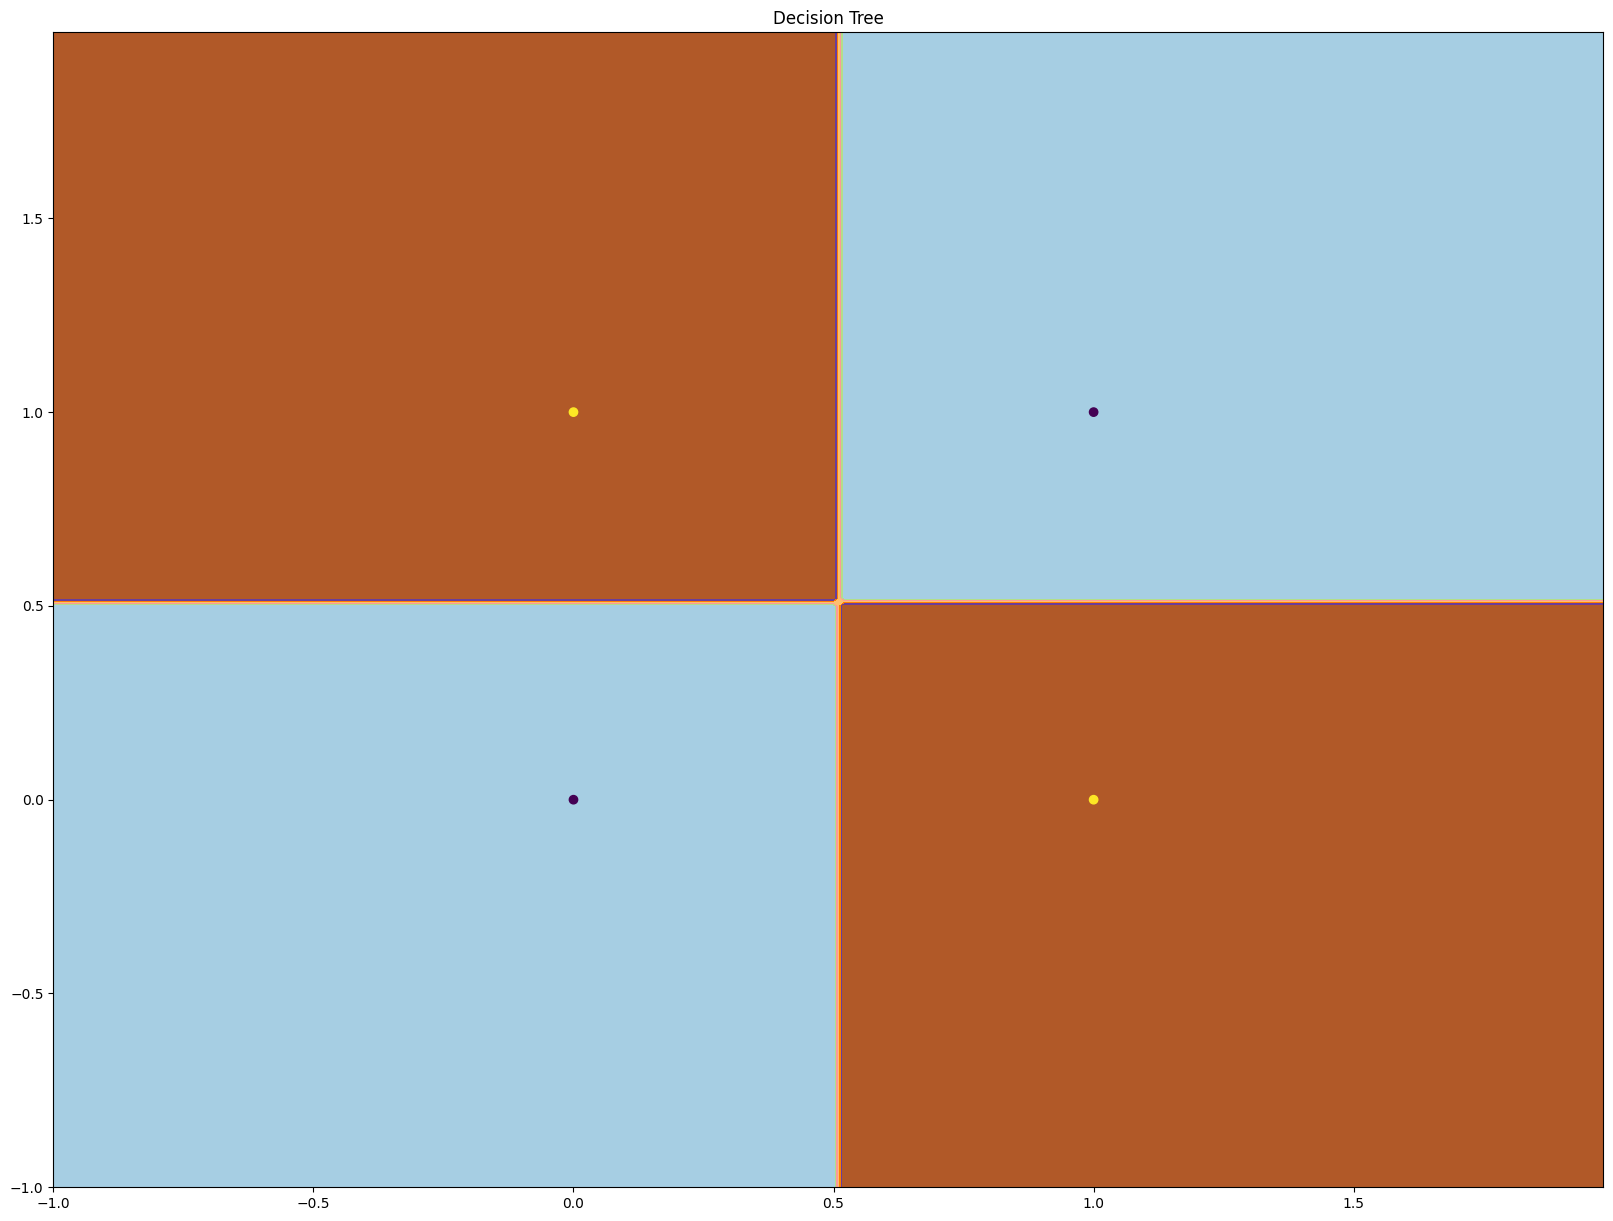

In [7]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()

# compute the results for all points in the mesh.
Z = np.array([decision_tree.predict([c])
              for c in zip(xx.ravel(), yy.ravel())])

# Put the result into a color plot
Z = Z.reshape(xx.shape) # fit them into the desired shape
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired) # perform plot

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)

ax.set_title('Decision Tree')

#### Predict an unseen example

In [8]:
unseen_instance = [1,-1]
decision_tree.predict([unseen_instance])

array([1])

#### Visualize the decision tree (graphviz needs to be installed)

# Example: Real (CBS) data

#### Read reference data: description of columns in data

In [9]:
column_reference_table = {}
with open(os.path.join(data_directory, "kwb-2018-toelichting.csv")) as file:
    reader = csv.reader(file, delimiter=';')
    for row in reader:
        column_reference_table[row[0]] = row[1]

#### Get a better description of a column name

In [10]:
column_reference_table['a_hh']

'Huishoudens totaal'

#### Read the actual data: CBS 'gemeente / wijk / buurt statistieken'

In [11]:
with open(os.path.join(data_directory, "kwb-2018.csv"), encoding='latin1') as file:
    data = pd.read_csv(file, sep =';')
print(f"The available features:\t {list(data)}")

The available features:	 ['gwb_code_10', 'gwb_code_8', 'regio', 'gm_naam', 'recs', 'gwb_code', 'ind_wbi', 'a_inw', 'a_man', 'a_vrouw', 'a_00_14', 'a_15_24', 'a_25_44', 'a_45_64', 'a_65_oo', 'a_ongeh', 'a_gehuwd', 'a_gesch', 'a_verwed', 'a_w_all', 'a_nw_all', 'a_marok', 'a_antaru', 'a_suri', 'a_tur', 'a_ov_nw', 'a_hh', 'a_1p_hh', 'a_hh_z_k', 'a_hh_m_k', 'g_hhgro', 'bev_dich', 'a_woning', 'g_woz', 'p_1gezw', 'p_mgezw', 'p_bewndw', 'p_leegsw', 'p_koopw', 'p_huurw', 'p_wcorpw', 'p_ov_hw', 'p_e_o_w', 'p_bjj2k', 'p_bjo2k', 'a_pau', 'a_bst_b', 'a_bst_nb', 'g_pau_hh', 'g_pau_km', 'a_m2w', 'a_opp_ha', 'a_lan_ha', 'a_wat_ha', 'ste_mvs', 'ste_oad']


#### There are different types of regions in the dataset

In [12]:
data['recs'].unique()

array(['Land', 'Gemeente', 'Wijk', 'Buurt'], dtype=object)

In [13]:
selected_region_type = 'Gemeente'

In [14]:
data_for_selected_region_type = data[data.recs == selected_region_type]
data_for_selected_region_type.shape

(380, 56)

##### Devise supervised dataset, with target variable [ste_mvs], the degree of urbanisation.
##### First select the features

In [15]:
# select the features
feature_names = ['a_opp_ha','a_hh']

In [16]:
X = data_for_selected_region_type[feature_names]
X.head(5)

a_opp_ha    a_hh
1       2458    5540
9       4496    4391
19      4573    2980
34     22750   11617
64     10150  122541

##### Now set the target variable

In [17]:
target_variable_name = 'ste_mvs'

#### ste_mvs: Mate van stedelijkheid

Op grond van de omgevingsadressendichtheid is aan iedere buurt, wijk of gemeente een stedelijkheidsklasse toegekend. De volgende klassenindeling is gehanteerd:

1: zeer sterk stedelijk >= 2 500 adressen per km²

2: sterk stedelijk 1 500 - 2 500 adressen per km²

3: matig stedelijk 1 000 - 1 500 adressen per km²

4: weinig stedelijk 500 - 1 000 adressen per km²

5: niet stedelijk < 500 adressen per km²

In [18]:
y_real = data_for_selected_region_type[[target_variable_name]]

y_real[target_variable_name].value_counts()

4    135
3     78
5     74
2     74
1     19
Name: ste_mvs, dtype: int64

In [19]:
target_names = y_real.sort_values(by=[target_variable_name])[target_variable_name].unique()
target_names

array(['1', '2', '3', '4', '5'], dtype=object)

#### Now train the Decision Tree

In [20]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 1)
decision_tree.fit(X, y_real)

DecisionTreeClassifier(max_depth=10)

In [21]:
y_pred = decision_tree.predict(X)

##### Validate the model

We are actually committing a huge machine learning crime in training and testing the model, but that will be covered in later material.

For now, you may assume is that a higher accuracy is better (and 1 is perfect).

In [22]:
from sklearn.metrics import accuracy_score
print(f"Your model scores: {accuracy_score(y_real, y_pred)}")

Your model scores: 0.9473684210526315


##### Visualize the model

In [23]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                      feature_names=feature_names,
                      class_names=target_names,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph

graph.render('../decision_tree', view=True) # for printing to pdf

'../decision_tree.pdf'

##### Use the model with unseen data

In [24]:
# data: inwoners, huishoudens
# 1: zeer sterk stedelijk >= 2 500 adressen per km²
# 2: sterk stedelijk 1 500 - 2 500 adressen per km²
# 3: matig stedelijk 1 000 - 1 500 adressen per km²
# 4: weinig stedelijk 500 - 1 000 adressen per km²
# 5: niet stedelijk < 500 adressen per km²

# create a dataframe with 1 record with preset values
new_x = pd.DataFrame({'a_opp_ha':500000000,
                                'a_hh':1
                               }, index=[0]
                              )
decision_tree.predict(new_x)

array(['5'], dtype=object)

In [25]:
new_x = pd.DataFrame({'a_hh':500000000,
                                'a_opp_ha':1
                               }, index=[0]
                              )
new_x

a_hh  a_opp_ha
0  500000000         1

In [26]:
# a_opp_ha is totale oppervlakte in hele hectaren.
# een km2 is 100 hectaren
# data: inwoners, huishoudens
# 1: zeer sterk stedelijk >= 2 500 adressen per km²
# 2: sterk stedelijk 1 500 - 2 500 adressen per km²
# 3: matig stedelijk 1 000 - 1 500 adressen per km²
# 4: weinig stedelijk 500 - 1 000 adressen per km²
# 5: niet stedelijk < 500 adressen per km²

data_for_selected_region_type['a_hh_p_km2'] = data_for_selected_region_type['a_hh'] / (data_for_selected_region_type['a_opp_ha']/100)
data_for_selected_region_type[['a_hh_p_km2','a_hh','a_opp_ha']].head(5)

<ipython-input-26-edc8a0b3cd1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_selected_region_type['a_hh_p_km2'] = data_for_selected_region_type['a_hh'] / (data_for_selected_region_type['a_opp_ha']/100)


a_hh_p_km2    a_hh  a_opp_ha
1    225.386493    5540      2458
9     97.664591    4391      4496
19    65.165099    2980      4573
34    51.063736   11617     22750
64  1207.300493  122541     10150

Your model scores: 0.9473684210526315


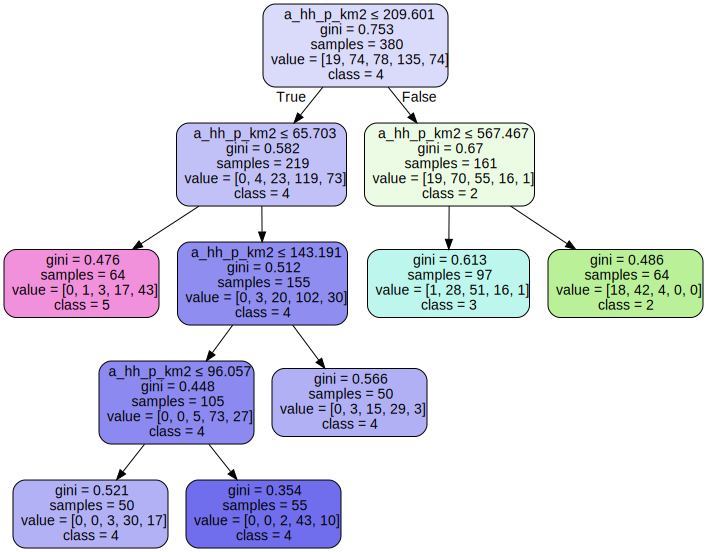

In [27]:
# all in one cell
feature_names = ['a_hh_p_km2']
X = data_for_selected_region_type[feature_names]

decision_tree = tree.DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 50)
decision_tree.fit(X, y_real)

print(f"Your model scores: {accuracy_score(y_real, y_pred)}")

dot_data = tree.export_graphviz(decision_tree, out_file=None,
                      feature_names=feature_names,
                      class_names=target_names,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [28]:
# # data: inwoners, huishoudens
# # 1: zeer sterk stedelijk >= 2 500 adressen per km²
# # 2: sterk stedelijk 1 500 - 2 500 adressen per km²
# # 3: matig stedelijk 1 000 - 1 500 adressen per km²
# # 4: weinig stedelijk 500 - 1 000 adressen per km²
# # 5: niet stedelijk < 500 adressen per km²

# data_for_selected_region_type[data_for_selected_region_type['a_hh_p_km2']<500][['gm_naam','recs','a_woning','a_hh','a_opp_ha','a_hh_p_km2','ste_mvs']]

In [29]:
# data_for_selected_region_type[data_for_selected_region_type['ste_mvs']=='3'][['gm_naam','recs','a_woning','a_hh','a_lan_ha','a_opp_ha','a_hh_p_km2','ste_mvs']]

##### Small deviations in data can lead to completely different models / trees, see random forest for possible solution